In [1]:
# random imputation:
# can be used in both numerical and categorical imputation
# not available in sklearn
# pdf is preserved (based on probablity)
# variance is preserved but covariance is not

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

%matplotlib inline

# for numerical data

excel_file_path = "./titanic_toy.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [2]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [3]:
# X_train['Age_imputed'].isnull() returns a boolean mask indicating True for missing values (NaN) in the 'Age_imputed' column.
# X_train['Age'].dropna() drops missing values from the 'Age' column.
# .sample(X_train['Age'].isnull().sum()) randomly samples non-null values from the 'Age' column,
# where the number of samples is equal to the count of missing values in the 'Age_imputed' column.
# .values converts the sampled values to a numpy array.
# The right-hand side of the assignment generates a series of sampled values from the 'Age' column,
# matching the number of missing values in the 'Age_imputed' column.
# The left-hand side selects the rows in the 'Age_imputed' column where the value is missing (NaN).

df["Age_imputed"] = df["Age"]
# print(df['Age'][df['Age_imputed'].isnull()])
# print(df['Age'].dropna().sample(df['Age'].isnull().sum()).values)
df["Age_imputed"][df["Age_imputed"].isnull()] = (
    df["Age"].dropna().sample(df["Age"].isnull().sum()).values
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10924\3051201348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values


In [4]:
df["Age_imputed"].isnull().sum()

0

In [5]:
df.cov()

,Age,Fare,Family,Survived,Age_imputed
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125
Fare,78.071438,2530.673077,17.460363,6.442361,46.907220
Family,-6.507525,17.460363,2.603248,0.013063,-5.668360
Survived,-0.551296,6.442361,0.013063,0.236772,-0.519948
Age_imputed,211.019125,46.907220,-5.668360,-0.519948,207.458094


In [6]:
# df['Age_imputed'] value is decided on the basis for the same fare value
df["Age_imputed"] = df["Age"]
df["Age_imputed"][df["Age_imputed"].isnull()] = (
    df["Age"].dropna().sample(1, random_state=int(df["Fare"].values[0]))
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10924\3248645889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(1, random_state=int(df['Fare'].values[0]))


In [7]:
df.cov()

,Age,Fare,Family,Survived,Age_imputed
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125
Fare,78.071438,2530.673077,17.460363,6.442361,78.071438
Family,-6.507525,17.460363,2.603248,0.013063,-6.507525
Survived,-0.551296,6.442361,0.013063,0.236772,-0.551296
Age_imputed,211.019125,78.071438,-6.507525,-0.551296,211.019125


In [8]:
# for categorical data
df_categorical = pd.read_csv(
    "house-train.csv", usecols=["GarageQual", "FireplaceQu", "SalePrice"]
)
df_categorical.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df_categorical.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [10]:
df_categorical["GarageQual_imputed"] = df_categorical["GarageQual"]
df_categorical["FireplaceQu_imputed"] = df_categorical["FireplaceQu"]

In [11]:
df_categorical["GarageQual_imputed"][df_categorical["GarageQual_imputed"].isnull()] = (
    df_categorical["GarageQual"]
    .dropna()
    .sample(df_categorical["GarageQual"].isnull().sum())
    .values
)
df_categorical["FireplaceQu_imputed"][
    df_categorical["FireplaceQu_imputed"].isnull()
] = (
    df_categorical["FireplaceQu"]
    .dropna()
    .sample(df_categorical["FireplaceQu"].isnull().sum())
    .values
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10924\3608915742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['GarageQual_imputed'][df_categorical['GarageQual_imputed'].isnull()] = df_categorical['GarageQual'].dropna().sample(df_categorical['GarageQual'].isnull().sum()).values
C:\Users\hp\AppData\Local\Temp\ipykernel_10924\3608915742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['FireplaceQu_imputed'][df_categorical['FireplaceQu_imputed'].isnull()] = df_categorical['FireplaceQu'].dropna().sample(df_categorical['FireplaceQu'].isnull().sum()).values


In [12]:
df_categorical.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1046,Gd,TA,556581,TA,Gd
186,NaN,TA,173000,TA,Po
365,NaN,TA,147000,TA,TA
1181,Gd,TA,392500,TA,Gd
21,Gd,TA,139400,TA,Gd


In [13]:
print(df_categorical["GarageQual_imputed"].isnull().sum())
print(df_categorical["FireplaceQu_imputed"].isnull().sum())

0
0


In [14]:
# there should'nt be too much difference between orignal and imputed to do imputation

temp = pd.concat(
    [
        df_categorical["GarageQual"].value_counts() / len(df_categorical),
        df_categorical["GarageQual_imputed"].value_counts() / len(df_categorical),
    ],
    axis=1,
)

temp.columns = ["original", "imputed"]
temp

,original,imputed
TA,0.897945,0.952740
Fa,0.032877,0.033562
Gd,0.009589,0.009589
Ex,0.002055,0.002055
Po,0.002055,0.002055


In [15]:
# there should'nt be too much difference between orignal and imputed to do imputation

temp = pd.concat(
    [
        df_categorical["FireplaceQu"].value_counts() / len(df_categorical),
        df_categorical["FireplaceQu_imputed"].value_counts() / len(df_categorical),
    ],
    axis=1,
)

temp.columns = ["original", "imputed"]
temp

,original,imputed
Gd,0.260274,0.489041
TA,0.214384,0.408904
Fa,0.022603,0.043151
Ex,0.016438,0.032192
Po,0.013699,0.026712


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

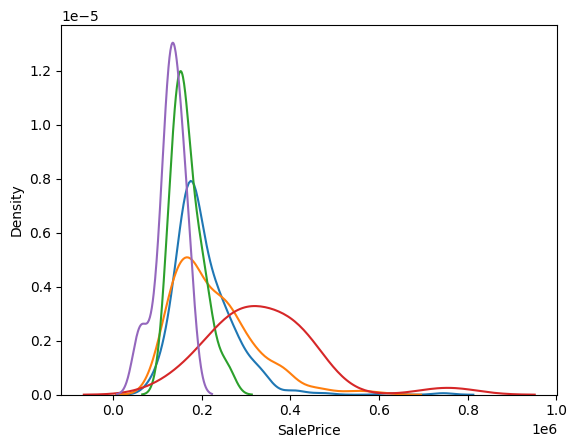

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

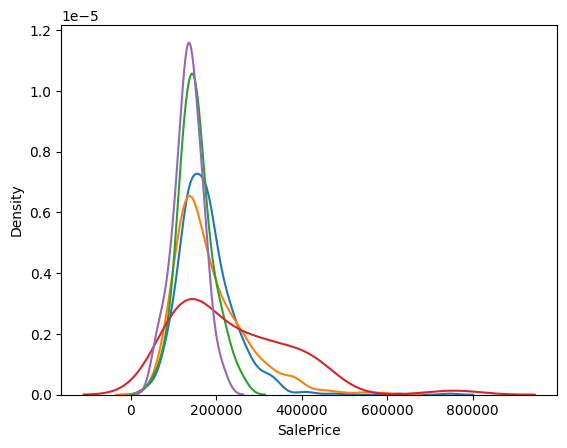

In [16]:
# there shouldn't be much changes in graph before and after imputation

for category in df_categorical["FireplaceQu"].dropna().unique():
    sns.kdeplot(df_categorical[df_categorical["FireplaceQu"] == category]["SalePrice"])
plt.show()
for category in df_categorical["FireplaceQu_imputed"].dropna().unique():
    sns.kdeplot(
        df_categorical[df_categorical["FireplaceQu_imputed"] == category]["SalePrice"]
    )
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

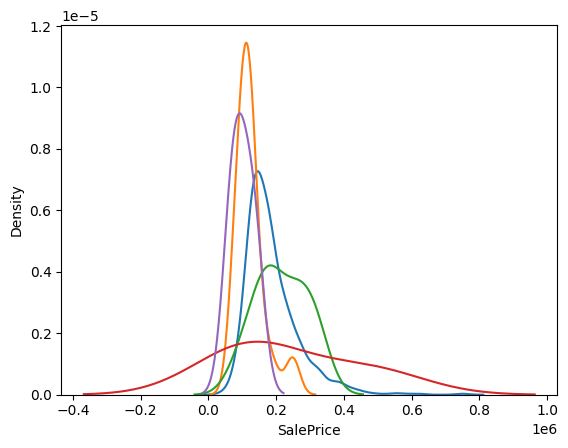

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

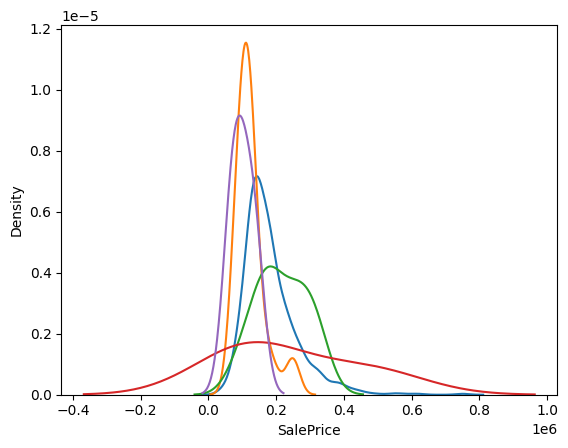

In [17]:
# there shouldn't be much changes in graph before and after imputation

for category in df_categorical["GarageQual"].dropna().unique():
    sns.kdeplot(df_categorical[df_categorical["GarageQual"] == category]["SalePrice"])
plt.show()
for category in df_categorical["GarageQual_imputed"].dropna().unique():
    sns.kdeplot(
        df_categorical[df_categorical["GarageQual_imputed"] == category]["SalePrice"]
    )
plt.show()